In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
from sklearn import ensemble, learning_curve, metrics, datasets, tree
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

In [13]:
digits = datasets.load_digits()


In [82]:
X = digits.data
y = digits.target
print(int(sqrt(X.shape[1])))

8


##Модель DecisionTreeClassifier

In [15]:
dtc = tree.DecisionTreeClassifier(random_state=1)

In [18]:
print(cross_val_score(dtc, X, y, cv=10).mean())

0.8308624439503834


##BaggingClassifier

In [19]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bcl = BaggingClassifier(base_estimator=dtc, n_estimators=100)

In [29]:
print(cross_val_score(bcl, X, y, cv=10).mean())

0.9260122951175479


In [31]:
bcl = BaggingClassifier(base_estimator=dtc, n_estimators=100)
print(cross_val_score(bcl, X, y, cv=10).mean())

0.9337885283328677


In [92]:
dtc = tree.DecisionTreeClassifier(random_state=1, max_features='sqrt')
bcl = BaggingClassifier(base_estimator=dtc, n_estimators=50)
print(cross_val_score(bcl, X, y, cv=10).mean())

0.9477874226300639


In [96]:
dtc = tree.DecisionTreeClassifier(random_state=1, max_features=8)
bcl = BaggingClassifier(base_estimator=dtc, n_estimators=50)
print(cross_val_score(bcl, X, y, cv=10).mean())

0.952151552695596


##RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)
print(cross_val_score(rfc, X, y, cv=10).mean())

0.9494534874161682


In [80]:
xx = np.arange(5, 200, 5)
yy = list(map(lambda item: cross_val_score(RandomForestClassifier(
                    n_estimators=item, max_depth=10, random_state=1), X, y, cv=10).mean(),
             xx)
         )

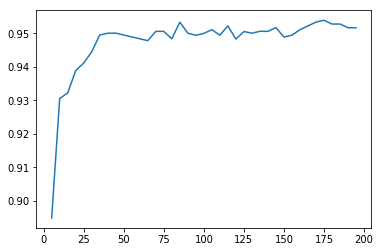

In [81]:
plt.plot(xx, yy)
plt.show()

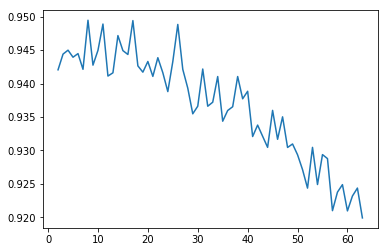

In [91]:
xx = np.arange(2, 64, 1)
yy = list(map(lambda item: cross_val_score(RandomForestClassifier(
                    n_estimators=50, max_depth=10, random_state=1, max_features=item), X, y, cv=10).mean(),
             xx)
         )
plt.plot(xx, yy)
plt.show()

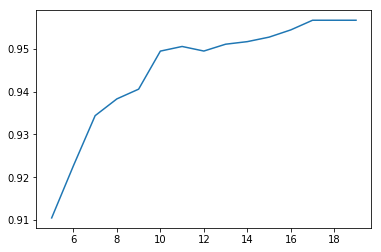

In [85]:
xx = np.arange(5, 20, 1)
yy = list(map(lambda item: cross_val_score(RandomForestClassifier(
                    n_estimators=50, max_depth=item, random_state=1), X, y, cv=10).mean(),
             xx)
         )
plt.plot(xx, yy)
plt.show()